In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, regularizers
from tensorflow.keras.models import Sequential
from keras.preprocessing import sequence
from keras.layers.embeddings import Embedding
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM,Dropout,BatchNormalization

In [46]:
top_words = 10000;
input_length = 1000;

In [47]:
(x_train, y_train), (x_test, y_test) = datasets.imdb.load_data(num_words=top_words)

In [48]:
x_train = sequence.pad_sequences(x_train, maxlen=input_length)
x_test = sequence.pad_sequences(x_test, maxlen=input_length)

In [49]:
x_train.shape

(25000, 1000)

In [50]:
x_test.shape

(25000, 1000)

In [51]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.20, random_state = 42, stratify=y_train)

In [53]:
model = Sequential()
model.add(Embedding(top_words, 50, input_length=input_length, embeddings_regularizer=regularizers.L2(0.03)))

model.add(BatchNormalization())
model.add(LSTM(32))

model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 1000, 50)          500000    
                                                                 
 batch_normalization_6 (Batc  (None, 1000, 50)         200       
 hNormalization)                                                 
                                                                 
 lstm_3 (LSTM)               (None, 32)                10624     
                                                                 
 batch_normalization_7 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [54]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(patience=5)

In [55]:
history = model.fit(x_train, y_train, batch_size=16, validation_data=(x_val, y_val), validation_batch_size=16 , epochs=20, callbacks=[callback])

Epoch 1/20
1250/1250 [==============================] - 36s 28ms/step - loss: 0.9764 - accuracy: 0.7599 - val_loss: 0.6555 - val_accuracy: 0.8362
Epoch 2/20
1250/1250 [==============================] - 34s 27ms/step - loss: 0.6479 - accuracy: 0.8458 - val_loss: 0.5767 - val_accuracy: 0.8708
Epoch 3/20
1250/1250 [==============================] - 34s 27ms/step - loss: 0.6331 - accuracy: 0.8549 - val_loss: 0.6191 - val_accuracy: 0.8622
Epoch 4/20
1250/1250 [==============================] - 34s 27ms/step - loss: 0.5892 - accuracy: 0.8662 - val_loss: 0.5466 - val_accuracy: 0.8530
Epoch 5/20
1250/1250 [==============================] - 34s 27ms/step - loss: 0.5516 - accuracy: 0.8759 - val_loss: 0.5479 - val_accuracy: 0.8708
Epoch 6/20
1250/1250 [==============================] - 34s 27ms/step - loss: 0.5414 - accuracy: 0.8816 - val_loss: 0.5067 - val_accuracy: 0.8858
Epoch 7/20
1250/1250 [==============================] - 34s 27ms/step - loss: 0.5210 - accuracy: 0.8822 - val_loss: 0.5104 -

In [56]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=2)
print('Loss : ', loss)
print('Acc :', accuracy*100)

782/782 - 10s - loss: 0.4586 - accuracy: 0.8819 - 10s/epoch - 13ms/step
Loss :  0.45863789319992065
Acc : 88.1879985332489


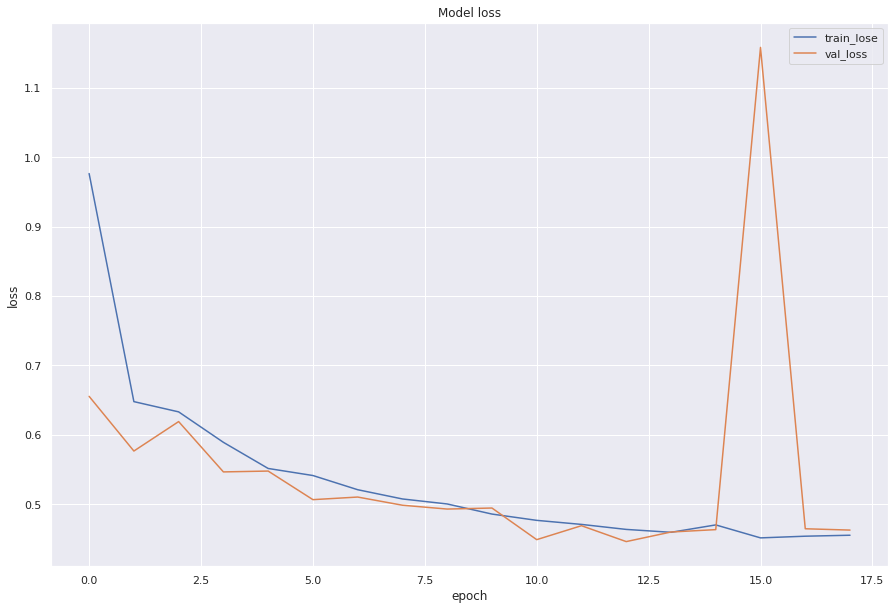

In [57]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_lose', 'val_loss'])
plt.show()

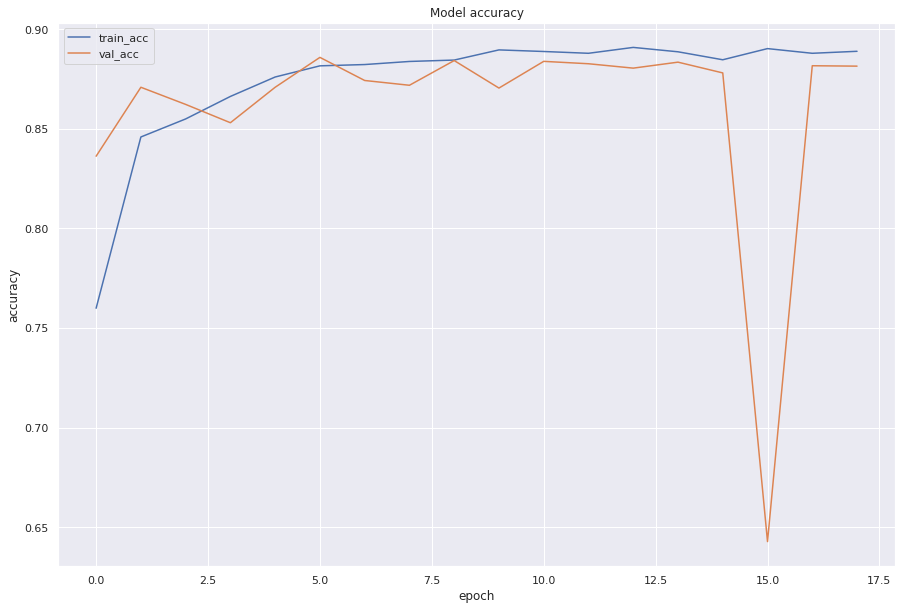

In [58]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train_acc','val_acc'])
plt.show()

In [59]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

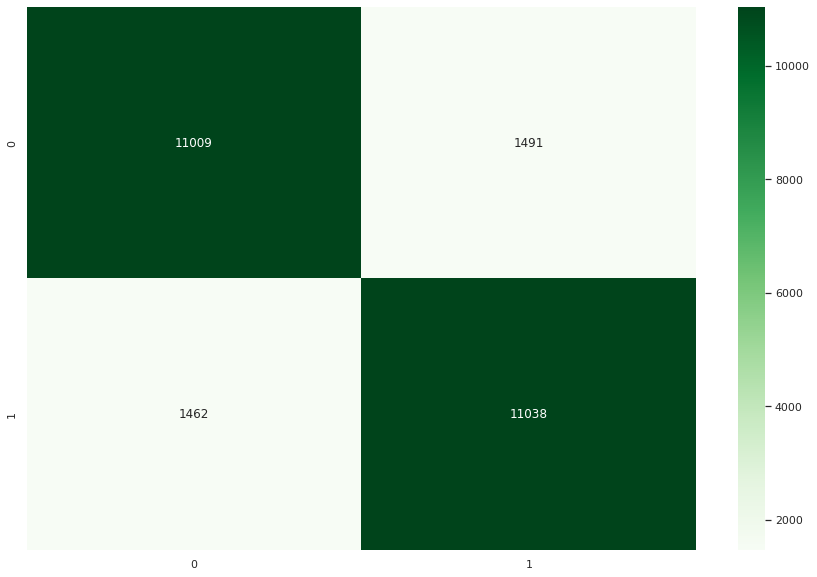

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
sns.set(rc={'figure.figsize':(15, 10)})
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='1', cmap='Greens');